In [12]:
import math
import numpy as np
import pandas as pan
import matplotlib.pyplot as plt

### **Executing Kruskal naive**

In [13]:
df = pan.read_csv('output_kruskal_n.csv',header=None)
print(df)

     0       1       2             3            4          5      6
0    1      10       9  3.830959e+04     0.000038      29316  13603
1    2      10      11  4.435140e+04     0.000044      16940  16713
2    3      10      13  5.104495e+04     0.000051     -44448  18487
3    4      10      10  4.378773e+04     0.000044      25217  21286
4    5      20      24  9.882204e+04     0.000099     -32021   9787
..  ..     ...     ...           ...          ...        ...    ...
63  64   80000  106554  6.569830e+11   656.982776 -180793224      1
64  65  100000  133395  1.113110e+12  1113.112826 -230698391      1
65  66  100000  133214  1.112610e+12  1112.607324 -230168572      1
66  67  100000  133524  1.131360e+12  1131.364650 -231393935      1
67  68  100000  133463  1.110300e+12  1110.298442 -231011693      1

[68 rows x 7 columns]


In [14]:
df_kruskal=df
df_kruskal.drop(df_kruskal.columns[0], inplace=True, axis=1) # Remove the custom Index

df_kruskal.columns = ['n_vertices', 'n_edges', 'time', 'time_in_s', 'weight', 'num_calls'] # Add Column Headings
#print(df_kruskal)

In [15]:
current_n_vertices = 0
sum_times = 0.0
sum_edges = 0

df_kruskal_new = pan.DataFrame()

for index, row in df_kruskal.iterrows():

  if current_n_vertices == 0:
    current_n_vertices = row['n_vertices']
  
  if current_n_vertices != row['n_vertices']:
    df_kruskal_temp= pan.DataFrame({'n_vertices': int(current_n_vertices), 'mean_edges': (sum_edges / 4), 'time': (sum_times / 4)}, index=[0])
    df_kruskal_new = pan.concat([df_kruskal_new, df_kruskal_temp], ignore_index=True)

    current_n_vertices = row['n_vertices']
    sum_times = 0.0
    sum_edges = 0

  if index == (df.shape[0]):
    sum_times += float(row['time'])
    sum_edges += int(row['n_edges'])
    df_kruskal_temp = pan.DataFrame({'n_vertices': int(current_n_vertices), 'mean_edges': (sum_edges / 4), 'time': (sum_times / 4)}, index=[0])
    df_kruskal_new = pan.concat([df_kruskal_new, df_kruskal_temp], ignore_index=True)
  else:
    sum_times += float(row['time'])
    sum_edges += int(row['n_edges'])

df_kruskal_new

,n_vertices,mean_edges,time
0,10,10.75,4.437342e+04
1,20,25.50,1.133237e+05
2,40,52.00,2.505108e+05
3,80,106.25,7.961066e+05
4,100,133.50,9.786582e+05
5,200,268.00,3.124288e+06
6,400,530.50,1.059513e+07
7,800,1061.50,3.846392e+07
8,1000,1321.25,6.035606e+07
9,2000,2670.50,2.384121e+08


In [16]:
ratios = [None] + [round(df_kruskal_new.iloc[i + 1]['time'] / df_kruskal_new.iloc[i]['time'], 6) for i in range((df_kruskal_new.shape[0] - 1))]
ratios

[None,
 2.553864,
 2.210578,
 3.177933,
 1.229306,
 3.19242,
 3.391214,
 3.63034,
 1.56916,
 3.950093,
 3.968556,
 3.931179,
 1.550478,
 4.102169,
 5.02466,
 5.523683]

In [17]:
c_estimates = [round(df_kruskal_new.iloc[i]['time'] / (float(df_kruskal_new.iloc[i]['mean_edges']) * float(df_kruskal_new.iloc[i]['n_vertices'])), 6) for i in range(df_kruskal_new.shape[0])]
c_estimates

[412.775957,
 222.203262,
 120.437885,
 93.659597,
 73.307733,
 58.288948,
 49.929913,
 45.294299,
 45.681026,
 44.638093,
 44.247846,
 43.4581,
 43.32907,
 44.286893,
 55.696812,
 76.941177]

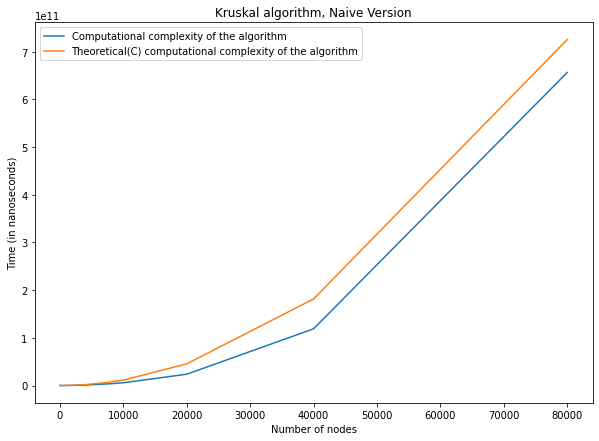

In [18]:
reference = []
for i in range(df_kruskal_new.shape[0]):
  reference = [round(85.029095 * float(df_kruskal_new.iloc[i]['mean_edges']) * float(df_kruskal_new.iloc[i]['n_vertices']), 6) for i in range(df_kruskal_new.shape[0])]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(df_kruskal_new['n_vertices'], df_kruskal_new['time'], label='Computational complexity of the algorithm')
ax.plot(df_kruskal_new['n_vertices'], reference, label='Theoretical(C) computational complexity of the algorithm')
ax.set_title('Kruskal algorithm, Naive Version')
plt.xlabel('Number of nodes')
plt.ylabel('Time (in nanoseconds)')
ax.legend()
plt.savefig('kruskal_naive.png')
plt.show()

### **Executing Kruskal Union-Find Algorithm**

In [19]:
df = pan.read_csv('output_kruskal_uf.csv',header=None)

In [20]:
df_kruskal_uf=df
df_kruskal_uf.drop(df_kruskal_uf.columns[0], inplace=True, axis=1) # Remove the custom Index

df_kruskal_uf.columns = ['n_vertices', 'n_edges', 'time', 'time_in_s', 'weight', 'num_calls'] # Add Column Headings
#print(df_kruskal)

In [21]:
current_n_vertices = 0
sum_times = 0.0
sum_edges = 0

df_kruskal_uf_new = pan.DataFrame()

for index, row in df_kruskal_uf.iterrows():
  
  if current_n_vertices == 0: #Run at init
    current_n_vertices = row['n_vertices']
  
  if current_n_vertices != row['n_vertices']: #for next graph which is non repetative
    df_kruskal_uf_temp = pan.DataFrame({'n_vertices': int(current_n_vertices), 'mean_edges': (sum_edges / 4), 'time': (sum_times / 4)}, index=[0])
    df_kruskal_uf_new = pan.concat([df_kruskal_uf_new, df_kruskal_uf_temp], ignore_index=True)

    current_n_vertices = row['n_vertices']
    sum_times = 0.0
    sum_edges = 0

  if index == (df.shape[0]):
    sum_times += float(row['time'])
    sum_edges += int(row['n_edges'])
    df_kruskal_uf_temp = pan.DataFrame({'n_vertices': int(current_n_vertices), 'mean_edges': (sum_edges / 4), 'time': (sum_times / 4)}, index=[0])
    df_kruskal_uf_new = pan.concat([df_kruskal_uf_new, df_kruskal_uf_temp], ignore_index=True)
  else:
    sum_times += float(row['time'])
    sum_edges += int(row['n_edges'])

df_kruskal_uf_new

,n_vertices,mean_edges,time
0,10,10.75,5.885459e+04
1,20,25.50,1.526077e+05
2,40,52.00,3.051172e+05
3,80,106.25,6.835873e+05
4,100,133.50,9.222234e+05
5,200,268.00,1.909793e+06
6,400,530.50,3.542375e+06
7,800,1061.50,8.998524e+06
8,1000,1321.25,1.093919e+07
9,2000,2670.50,2.111125e+07


In [22]:
ratios = [None] + [round(df_kruskal_uf_new.iloc[i + 1]['time'] / df_kruskal_uf_new.iloc[i]['time'], 6) for i in range((df_kruskal_uf_new.shape[0] - 1))]
ratios

[None,
 2.592962,
 1.999357,
 2.240409,
 1.349094,
 2.070857,
 1.854848,
 2.540252,
 1.215665,
 1.929873,
 2.183265,
 2.410524,
 1.242124,
 2.055041,
 2.598297,
 2.206923]

In [23]:
c_estimates = [round(df_kruskal_uf_new.iloc[i]['time'] / (float(df_kruskal_uf_new.iloc[i]['mean_edges']) * math.log(float(df_kruskal_uf_new.iloc[i]['n_vertices']), 2)), 6) for i in range(df_kruskal_uf_new.shape[0])]
c_estimates

[1648.092677,
 1384.709777,
 1102.540075,
 1017.689999,
 1039.763647,
 932.264096,
 772.50546,
 879.023675,
 830.785298,
 720.911039,
 720.56063,
 800.958777,
 780.327268,
 743.185113,
 903.409124,
 936.017338]

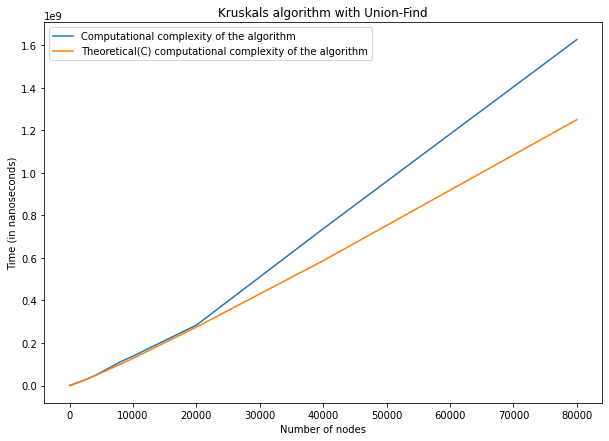

In [24]:
reference = []
for i in range(df_kruskal_uf_new.shape[0]):
  reference = [round(719.211383 * float(df_kruskal_uf_new.iloc[i]['mean_edges']) * math.log(float(df_kruskal_uf_new.iloc[i]['n_vertices']), 2), 6) for i in range(df_kruskal_uf_new.shape[0])]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(df_kruskal_uf_new['n_vertices'], df_kruskal_uf_new['time'], label='Computational complexity of the algorithm')
ax.plot(df_kruskal_uf_new['n_vertices'], reference, label='Theoretical(C) computational complexity of the algorithm')
ax.set_title('Kruskals algorithm with Union-Find')
plt.xlabel('Number of nodes')
plt.ylabel('Time (in nanoseconds)')
ax.legend()
plt.savefig('kruskal_uf.png')
plt.show()

### **Executing Prim's Algorithm**

In [25]:
df = pan.read_csv('output_prim.csv',header=None)

In [27]:
df_prim=df
df_prim.drop(df_prim.columns[0], inplace=True, axis=1) # Remove the custom Index

df_prim.columns = ['n_vertices', 'n_edges', 'time', 'time_in_s', 'weight', 'num_calls'] # Add Column Headings
#print(df_prim)

In [28]:
current_n_vertices = 0
sum_times = 0.0
sum_edges = 0

df_prim_new = pan.DataFrame()

for index, row in df_prim.iterrows():
  
  if current_n_vertices == 0:
    current_n_vertices = row['n_vertices']
  
  if current_n_vertices != row['n_vertices']:
    df_prim_temp = pan.DataFrame({'n_vertices': int(current_n_vertices), 'mean_edges': (sum_edges / 4), 'time': (sum_times / 4)}, index=[0]) #, index=range(0,16)
    df_prim_new = pan.concat([df_prim_new, df_prim_temp], ignore_index=True)

    current_n_vertices = row['n_vertices']
    sum_times = 0.0
    sum_edges = 0

  if index == (df.shape[0]):
    sum_times += float(row['time'])
    sum_edges += int(row['n_edges'])
    df_prim_temp = pan.DataFrame({'n_vertices': int(current_n_vertices), 'mean_edges': (sum_edges / 4), 'time': (sum_times / 4)}, index=[0]) #, index=range(0,16)
    df_prim_new = pan.concat([df_prim_new, df_prim_temp], ignore_index=True)
  else:
    sum_times += float(row['time'])
    sum_edges += int(row['n_edges'])

df_prim_new

,n_vertices,mean_edges,time
0,10,10.75,8.580654e+04
1,20,25.50,2.365723e+05
2,40,52.00,5.778784e+05
3,80,106.25,1.436755e+06
4,100,133.50,1.909301e+06
5,200,268.00,4.487947e+06
6,400,530.50,1.035114e+07
7,800,1061.50,2.363657e+07
8,1000,1321.25,3.065295e+07
9,2000,2670.50,7.013267e+07


In [29]:
ratios = [None] + [round(df_prim_new.iloc[i + 1]['time'] / df_prim_new.iloc[i]['time'], 6) for i in range((df_prim_new.shape[0] - 1))]
ratios

[None,
 2.757042,
 2.442714,
 2.486259,
 1.328898,
 2.350571,
 2.306432,
 2.283475,
 1.296844,
 2.287958,
 2.233359,
 2.214374,
 1.28057,
 2.192895,
 2.18921,
 2.203692]

In [30]:
c_estimates = [round(df_prim_new.iloc[i]['time'] / (float(df_prim_new.iloc[i]['mean_edges']) * math.log(float(df_prim_new.iloc[i]['n_vertices']), 2)), 6) for i in range(df_prim_new.shape[0])]
c_estimates

[2402.822582,
 2146.575175,
 2088.16169,
 2138.968104,
 2152.647134,
 2190.788481,
 2257.331768,
 2308.945982,
 2327.961519,
 2394.903854,
 2448.66304,
 2500.39222,
 2511.383304,
 2552.293485,
 2614.066697,
 2704.454794]

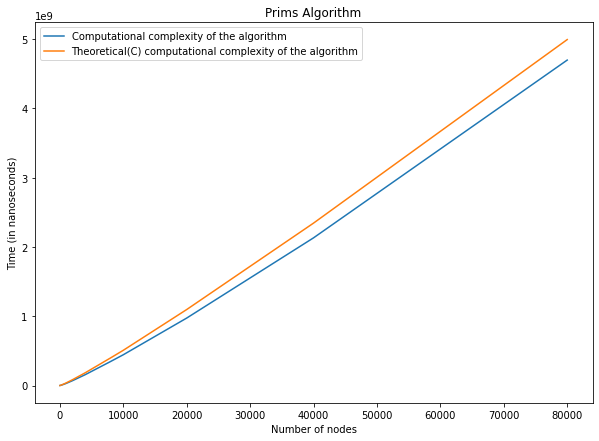

In [33]:
reference = []
for i in range(df_prim_new.shape[0]):
  reference = [round(2874.862482 * float(df_prim_new.iloc[i]['mean_edges']) * math.log(float(df_prim_new.iloc[i]['n_vertices']), 2), 6) for i in range(df_prim_new.shape[0])]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(df_prim_new['n_vertices'], df_prim_new['time'], label='Computational complexity of the algorithm')
ax.plot(df_prim_new['n_vertices'], reference, label='Theoretical(C) computational complexity of the algorithm')
ax.set_title('Prims Algorithm')
plt.xlabel('Number of nodes')
plt.ylabel('Time (in nanoseconds)')
ax.legend()
plt.savefig('prim.png')
plt.show()

### **Comparing: Kruskal Union-Find vs Prim**

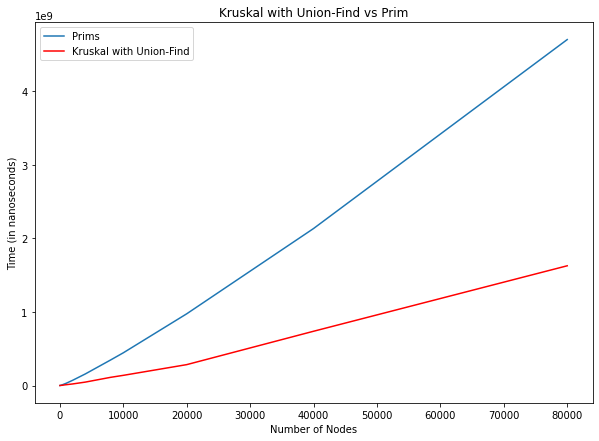

In [34]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(df_prim_new['n_vertices'], df_prim_new['time'], label='Prims')
ax.plot(df_kruskal_uf_new['n_vertices'], df_kruskal_uf_new['time'], color='red', label='Kruskal with Union-Find')
ax.set_title('Kruskal with Union-Find vs Prim')
plt.xlabel('Number of Nodes')
plt.ylabel('Time (in nanoseconds)')
ax.legend()
plt.savefig('kruskal_uf_vs_prim.png')
plt.show()